# Midterm Exam (part 1) - Computational Physics I

### Date: Wednesday 17 April 2024
### Credits: 10 points

### Duration: 45 minutes

## 1. (2 points) Python functions
Explain what a python function is, and list 4 types of python functions.

A python function is a block of code that performs a specific task. It is a reusable piece of code that can be called multiple times. The four types of python functions are:

1. Built-in functions
2. User-defined functions
3. Lambda functions
4. Recursive functions

## 2. (2 points) Interpolation versus regression
Explain the difference between carrying out interpolation versus regression in data analysis. When
do you use interpolation and when regression?

The main difference between interpolation and regression is that interpolation is used to estimate values between known data points, while regression is used to estimate the relationship between variables. Interpolation is used when you have a set of data points and you want to estimate the value of a function at a point within the range of the data. Regression is used when you have a set of data points and you want to find the relationship between the variables that generated the data.

## 3. (2 points) Gauss methods for systems of linear equations
Briefly explain how the LU decomposition and the Gauss elimination methods for solving systems
of linear equations work.

LU decomposition work by decomposing the matrix into a lower triangular matrix and an upper triangular matrix. The system of equations is then solved by forward and backward substitution. Gauss elimination works by transforming the matrix into an upper triangular matrix through a series of row operations. The system of equations is then solved by back substitution.

## 4. (2 points) Systems of nonlinear equations
Indicate 2 methods that we can use to solve systems of linear equations in python, and briefly
explain how each method works.


In python we can use the following methods to solve systems of non-linear equations:

- fsolve from scipy.optimize: This function uses a numerical method to find the roots of a system of non-linear equations. It requires an initial guess for the solution and uses the Newton-Raphson method to iteratively improve the solution.

- sympy.solve: This function uses symbolic computation to find the roots of a system of non-linear equations. It requires the equations to be defined symbolically and can find both real and complex solutions.


## 5. (2 points) Image processing
Imagine you obtain the following photograph of iron crystals from a scanning electron micro-
scope (credits: NASA/JSC), and you are asked to isolate the more prominent crystals from the
background and from the rest of the image. Design and sketch a suitable algorithm workflow to
achieve this goal in python.

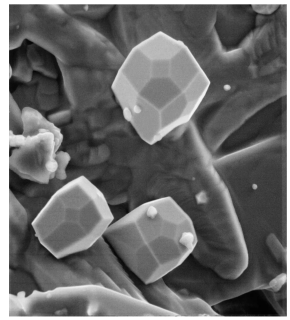

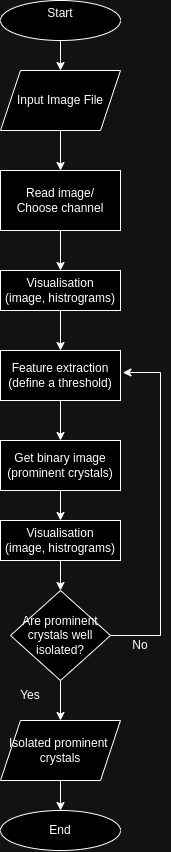

# Midterm Exam (part 2) - Computational Physics I

### Date: Wednesday 17 April 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

## Name: 

### Instructions:

- When you finish, please send me the **.ipynb** file via email to wbanda@yachaytech.edu.ec


- The exam is individual. Please include your name in the notebook.


- Within a **single python notebook**, solve the following problems:

## 6. I/O and regression: damped pendulum (5 points) 

This problem consists of studying damped oscillations. Remember that the 2nd-order ODE describing damped oscillations is:

$m\,\frac{d^2y}{dt^2}+b\,\frac{dy}{dt}+k\,y = 0$, 

where $m=1\,\rm kg$ is the oscillator mass, $b$ is the damping coefficient, and $k$ is the force constant of the oscillator. The analytical solution to the above ODE, known as the the damped oscillation equation, reads:

$y(t)=A\,e^{-\beta\,t}\,\cos{(\omega\,t)}$, 

where $A$ is  the inital oscillation amplitude, $\beta=\frac{b}{2m}$ is the damping ratio, and $\omega$ is the angular frequency of the oscillations given by:

$\omega = \sqrt{\frac{k}{m}-\frac{b^2}{4m^2}}$.

The data file given below contains a time series obtained from a damped harmonic oscillator experiment. The first column of the file has times in seconds $\rm [s]$ and the second column has the displacements in meters $\rm [m]$. 

https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/damped_pendulum.csv


##### Data reference: https://www.kaggle.com/datasets/cici118/damped-harmonic-oscillator

# Midterm Exam (part 2) - Computational Physics I

### Date: Wednesday 17 April 2024
### Credits: 10 points

### Duration: 1 hour 15 minutes

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots as scplt
import scipy.optimize as opt
from PIL import Image, ImageDraw

#### a) Create a python I/O function that opens the data file and returns $2$ arrays, one for times and one for displacements.


In [3]:
# Create a function to read the file
def io_function(filename):
    """
    """
    df1 = pd.read_csv(filename)

    # get the time and displacement arrays
    time_data    = df1["time"].values
    displacement = df1["displacement"].values

    return time_data, displacement
    

#### b) Call your I/O function and make a high-quality labeled plot of displacement (in the Y axis) versus time (in the X axis).

In [4]:
# Filename 
file_name = "./damped_pendulum.csv"

# call the function 
time_arr, dis_arr = io_function(file_name)

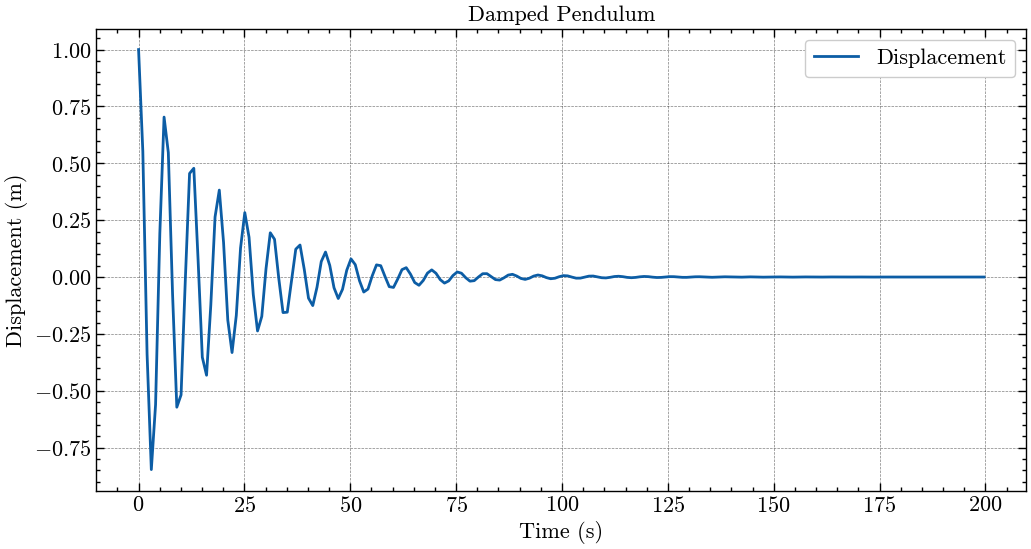

In [8]:
# Generate a plot 
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.plot(time_arr, dis_arr, label = "Displacement")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Displacement (m)")
    ax.set_title("Damped Pendulum")
    ax.legend()
    plt.show()

#### c) Use a physically-motivated model (i.e. the damped oscillation equation), and constrain its free parameters by carrying out a regression.



In [9]:
# Define the model
def model(t, A, beta, omega):
    return A * np.exp(-beta * t) * np.cos(omega * t)


In [11]:
# Fit the model to the data
popt, pcov = opt.curve_fit(model, time_arr, dis_arr, p0 = [1, 0.1, 1])

In [13]:
# generate a new time array
time_new = np.linspace(0, max(time_arr), 1000)

# generate the model
fit_model = model(time_new, *popt)

#### d) Report the results from your regression, i.e. the best-fit values for the free parametes with their respective uncertainties. Using your results, identify or calculate the following quantities in physical units:

- The initial amplitude, $A$, of the oscillations.
- The damping ratio, $\beta$.
- The angular frequency, $\omega$, of the damped pendulum.
- The damping coefficient, $b$.
- The force constant of the oscillator, $k$.


From our fitting we know the initial amplitude, the damping ratio and the angular frequency. We can use these results to calculate the damping coefficient and the force constant of the oscillator.

In [36]:
# Get the parameters
amplitude = popt[0]
beta      = popt[1]
omega     = popt[2]

In [30]:
# Compute the daming coefficient
b = beta * 2 

# Compute the force constant
k = omega ** 2 + b ** 2 / 4

In [41]:
# Report the results
print(f"Amplitude: {round(amplitude, 4)} [m]")
print(f"Beta: {round(beta, 4)} [1/s]")
print(f"Omega: {round(omega, 4)} [rad/s]")
print(f"Damping coefficient: {round(b, 4)} [N s/m]")
print(f"Force constant: {round(k, 4)} [N/m]")

Amplitude: 1.0031 [m]
Beta: 0.0501 [1/s]
Omega: 0.9962 [rad/s]
Damping coefficient: 0.1002 [N s/m]
Force constant: 0.995 [N/m]


#### e) Make a plot showing the empirical data and the best-fit model obtained from your regression.

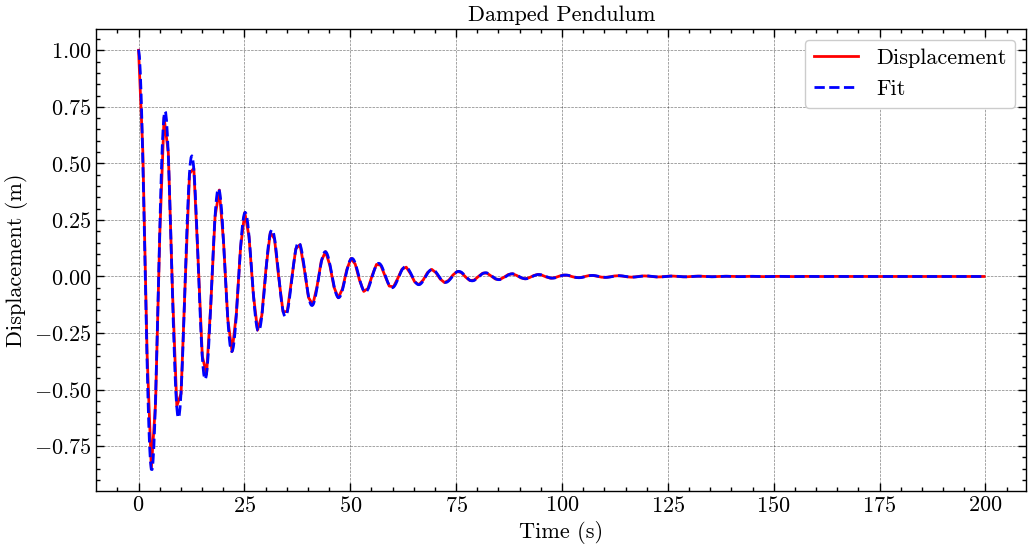

In [24]:
# Generate a plot
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(figsize = (12, 6))
    ax.plot(time_arr, dis_arr, c = 'red', label = "Displacement")
    ax.plot(time_new, fit_model, c = 'blue', linestyle = '--', label = "Fit")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Displacement (m)")
    ax.set_title("Damped Pendulum")
    ax.legend()
    plt.show()

## 7. Image processing: Scanning Electron Microscope of Escherichia coli (5 points)

This problem consists of analysing the reduction of the bacteria Escherichia coli (E. coli) after treatment with Zinc oxide (ZnO) nanoparticles. The images provided below were obtained from a Scanning Electron Microscope (SEM), before and after 5 hours of treatment with ZnO. One pixel of  the image has an area of $0.02^2\mu m^2$.

#### SEM image before ZnO treatment:
https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/bacteria_before.jpg

#### SEM image after ZnO treatment:
https://github.com/wbandabarragan/computational-physics-1/tree/main/sample-data/bacteria_after.jpg

##### SEM images reference: Zhang et al. 2007, https://link.springer.com/article/10.1007/s11051-006-9150-1

To analyse how effective this antibacterial treatment is, carry out the following analysis in python:


#### a) Create a python function that reads in an image file and returns one its channels as an array.


In [43]:
# Create a function to read the jpg image and return one of the channels
def read_image(image_file, channel = 0):
    """
    """
    # Open the image
    img = Image.open(image_file)

    # Get the channel
    img_channel = img.split()[channel]

    # Convert to numpy array
    img_array = np.array(img_channel)

    return img_array

#### b) Call your function from (a), and:

- Make a 2-panel figure showing the before and after SEM images.
- Make a 2-panel figure showing the before and after pixel histograms of the SEM images.



In [45]:
# define the image file
image_file1 = "./bacteria_before.jpg"
image_file2 = "./bacteria_after.jpg"

In [46]:
# read the image
cell_before = read_image(image_file1, channel = 0)
cell_after  = read_image(image_file2, channel = 0)

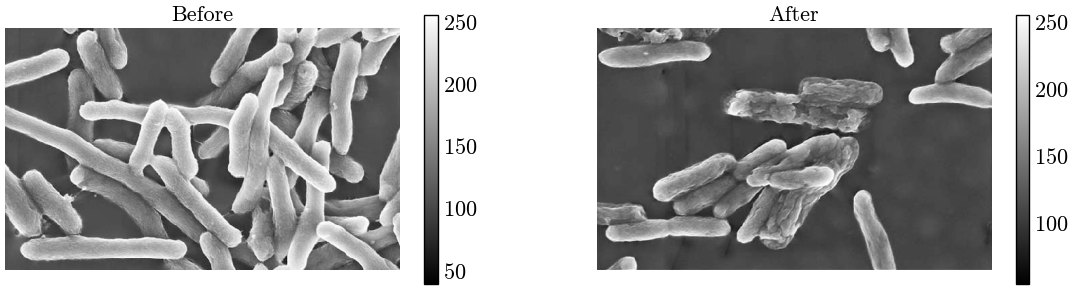

In [77]:
# Two panel plot 
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(1, 2, figsize = (14, 7))
    ax[0].imshow(cell_before, cmap = 'gray')
    ax[0].set_title("Before")
    ax[0].axis("off")
    cb1 = plt.colorbar(ax[0].imshow(cell_before, cmap = 'gray'), shrink = 0.5)


    ax[1].imshow(cell_after, cmap = 'gray')
    ax[1].set_title("After")
    ax[1].axis("off")
    cb2 = plt.colorbar(ax[1].imshow(cell_after, cmap = 'gray'), shrink = 0.5)

    plt.show()

In [50]:
# We need to flatten the images and make a histogram
cell_before_flat = cell_before.reshape(cell_before.size, 1)
cell_after_flat  = cell_after.reshape(cell_after.size, 1)

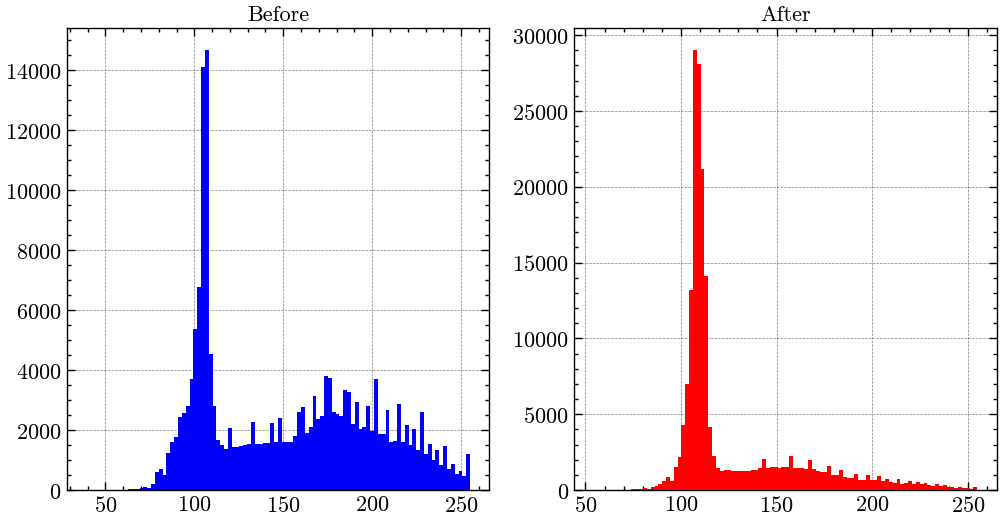

In [52]:
# Generate a histogram
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].hist(cell_before_flat, bins = 100, color = 'blue', )
    ax[0].set_title("Before")
    ax[1].hist(cell_after_flat, bins = 100, color = 'red')
    ax[1].set_title("After")
    plt.show()

#### c) Create a python function that isolates the area covered by the E. coli bacteria from the background. Your function should read in an image channel array and return a cleaned binary image array with zeroes in the background and ones in the E. coli area.

In [84]:
# c) Create a python function that isolates the area covered by the E. coli bacteria from the background. Your function should read in an image channel array and return a cleaned binary image array with zeroes in the background and ones in the E. coli area.

def isolate_bacteria(image_channel, threshold):
    """
    """

    # Create a binary image
    binary_image = np.where(image_channel > threshold, 1, 0)

    return binary_image

#### d) Call your function from (c), and:

- Make a 2-panel figure showing the before and after binary images.
- Make a 2-panel figure showing the before and after pixel histograms of the binary images.

In [113]:
# Apply the function to the images
binary_before = isolate_bacteria(cell_before, 116)
binary_after  = isolate_bacteria(cell_after, 127)

# Flatten the binary images
binary_before_flat = binary_before.reshape(binary_before.size, 1)
binary_after_flat  = binary_after.reshape(binary_after.size, 1)

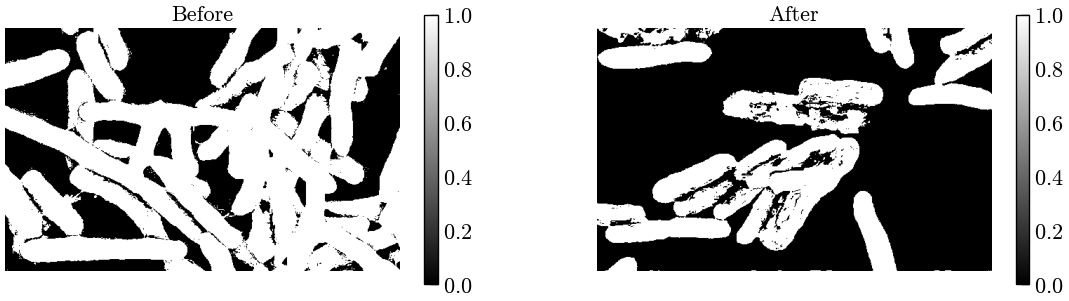

In [114]:
# Two panel plot
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(1, 2, figsize = (14, 7))
    ax[0].imshow(binary_before, cmap = 'gray')
    ax[0].set_title("Before")
    ax[0].axis("off")
    cb1 = plt.colorbar(ax[0].imshow(binary_before, cmap = 'gray'), shrink = 0.5)

    ax[1].imshow(binary_after, cmap = 'gray')
    ax[1].set_title("After")
    ax[1].axis("off")
    cb2 = plt.colorbar(ax[1].imshow(binary_after, cmap = 'gray'), shrink = 0.5)

    plt.show()

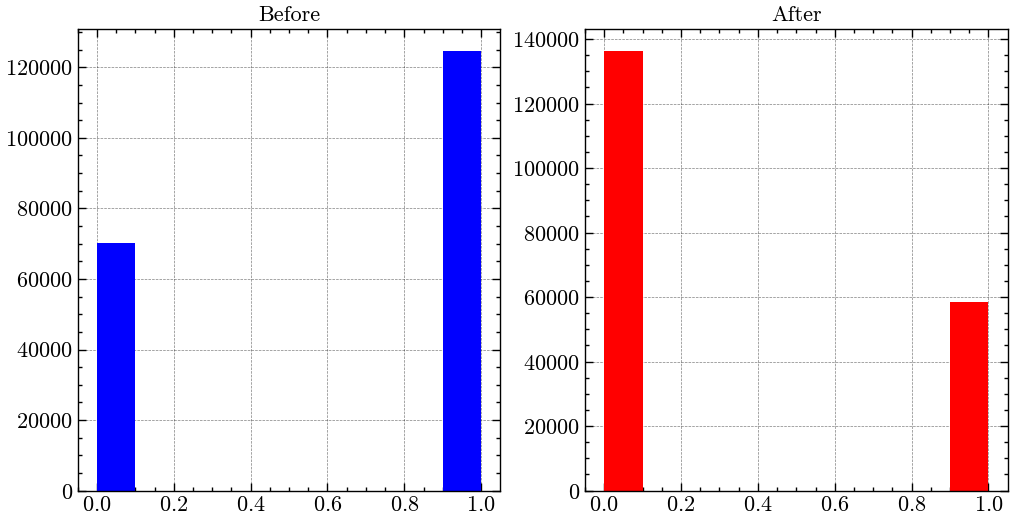

In [119]:
# Plot the histograms
with plt.style.context(['science', 'notebook', 'grid', 'no-latex']):
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].hist(binary_before_flat, bins = 10, color = 'blue')
    ax[0].set_title("Before")
    ax[1].hist(binary_after_flat, bins = 10, color = 'red')
    ax[1].set_title("After")
    plt.show()

#### e) Using your binary images, calculate the following:

- The total area in pixels and physical units covered by the E. coli bateria before and after treatment.
- The ratio between such areas, how effective is the antibacterial treatment with ZnO nanoparticles?

In [123]:
# Now, let's compute the area covered by the bacteria

def compute_area(binary_image):
    """
    """
    # define the pixel size
    pixel_area = 0.02 ** 2 # [micrometers]

    # compute the area
    area = np.sum(binary_image) * pixel_area

    return area

In [126]:
# Compute the area covered by the bacteria before
area_before = compute_area(binary_before)

# Compute the area covered by the bacteria after
area_after = compute_area(binary_after)

# Report the results
print("Area covered by the bacteria before: ", round(area_before, 4), " [μm^2]")
print("Area covered by the bacteria after: ", round(area_after, 4), " [μm^2]")

Area covered by the bacteria before:  49.886  [μm^2]
Area covered by the bacteria after:  23.3464  [μm^2]


In [128]:
# Compute the ratio of the areas
ratio = area_after / area_before

# Report the results
print("Ratio of the areas: ", round(ratio, 4))

Ratio of the areas:  0.468


We can see that after the antibacterial threatment the area covered by the E. coli bacteria is reduced by a factor of $0.468$. This means that the antibacterial treatment is $46.8\%$ effective.